<b>Assignment on Linear Regression:</b>
The following table shows the results of a recently conducted study on the correlation of the number of hours spent driving with the risk of developing acute backache. Find the equation of the best fit line for this data.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
X_driving_hours = [10, 9, 2, 15, 10, 16, 11, 16]
y_risk_score = [95, 80, 10, 50, 45, 98, 38, 93]

In [56]:
# optional, can use np.mean, np.var and np.cov as well
def mean(X: list) -> float:
	return sum(X) / len(X)

def n_variance(X: list, m: float):
	return sum([(xi - m)**2 for xi in X])

def n_cov(X: list, Y: list, mx: float, my: float):
	return sum([(xi - mx) * (yi - my) for xi, yi in zip(X, Y)])

In [57]:
mx, my = np.mean(X_driving_hours), np.mean(y_risk_score) # mean(X_driving_hours), mean(y_risk_score)
b1 = np.cov(X_driving_hours, y_risk_score, bias=True)[0][1] / np.var(X_driving_hours) # n_cov(X_driving_hours, y_risk_score, mx, my) / n_variance(X_driving_hours, mx)
b0 = my - b1 * mx

In [58]:
print("Coefficients: b0 = {}, b1 = {}".format(b0, b1))

Coefficients: b0 = 12.584627964022893, b1 = 4.58789860997547


In [59]:
def abline(slope, intercept, fmt = '--', label = None):
	"""Plot a line from slope and intercept"""
	axes = plt.gca()
	x_vals = np.array(axes.get_xlim()) # axis view limits
	y_vals = intercept + slope * x_vals
	plt.plot(x_vals, y_vals, fmt, label = label)

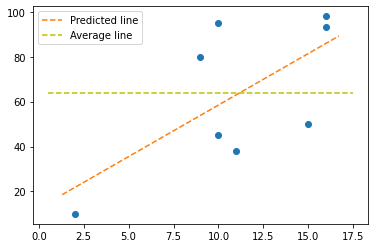

In [60]:
plt.plot(X_driving_hours, y_risk_score, 'o')
abline(b1, b0, '--', label='Predicted line')
abline(0, my, '--y', label='Average line')
plt.legend()
plt.show()

In [61]:
SSE_mean = sum([(yi - my) ** 2 for yi in y_risk_score]) # SST
SSE_yhat = sum([(yi - (b0 + b1 * xi)) ** 2 for xi, yi in zip(X_driving_hours, y_risk_score)]) # SSE
SSR = SSE_mean - SSE_yhat # SST - SSE
r2 = SSR / SSE_mean # R^2
print("SST", SSE_mean)
print("SSE", SSE_yhat)
print("SSR", SSR)
print("R^2", r2)

SST 7361.875
SSE 4144.037612428455
SSR 3217.837387571545
R^2 0.43709481451010035
